## 2. Clasificador Alpha-Betha

Para la solución de este problema se realiza la implemnetación en la sección 2.1 inicialmente la exploración del conjunto de datos que se tiene, sus características y relaciones principales entre los datos. A continuación, en la sección 2.2 se realiza la evaluación de modelos clasificadores en busqueda de obtener el mejor desempeño para la predicción de clasificación, en este se tiene en cuenta los tipos de datos contenidos en el conjunto de características, el balanceo de los datos, y el análisis de importancia de las características. Finalmente en la sección 2.3 se presenta el modelo final seleccionado con mejor desempeño para la clasificación de los datos, para éste caso el modelo de Regresión Lógistica. 

Para el entrenamiento y ajuste de los modelos y su evaluación, se dividió el dataset en 80% para datos de entrenamiento y 20% para datos de pruebas. 

Como salidas de la implementación se agregan en la carpeta output el modelo nombrado clasificator_model.pkl y el archivo de texto output_clasificator.txt con la información de las métricas generadas por el modelo, las características del modelo y el número de datos de entrenamiento y testeo.

### 2.1 Exploración del Conjunto de Datos

In [10]:
import pandas as pd
data = pd.read_csv('../data/dataset_alpha_betha.csv')
data.dropna() #Clean of NAN data rows
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   autoID            7043 non-null   object 
 1   SeniorCity        7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   Service1          7043 non-null   object 
 5   Service2          7043 non-null   object 
 6   Security          7043 non-null   object 
 7   OnlineBackup      7043 non-null   object 
 8   DeviceProtection  7043 non-null   object 
 9   TechSupport       7043 non-null   object 
 10  Contract          7043 non-null   object 
 11  PaperlessBilling  7043 non-null   object 
 12  PaymentMethod     7043 non-null   object 
 13  Charges           7043 non-null   float64
 14  Demand            7043 non-null   object 
 15  Class             7043 non-null   object 
dtypes: float64(1), int64(1), object(14)
memory

In [11]:
data.head()

,autoID,SeniorCity,Partner,Dependents,Service1,Service2,Security,OnlineBackup,DeviceProtection,TechSupport,Contract,PaperlessBilling,PaymentMethod,Charges,Demand,Class
0,7590-VHVEG,0,Yes,No,No,No phone service,No,Yes,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,Alpha
1,5575-GNVDE,0,No,No,Yes,No,Yes,No,Yes,No,One year,No,Mailed check,56.95,1889.5,Alpha
2,3668-QPYBK,0,No,No,Yes,No,Yes,Yes,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Betha
3,7795-CFOCW,0,No,No,No,No phone service,Yes,No,Yes,Yes,One year,No,Bank transfer (automatic),42.30,1840.75,Alpha
4,9237-HQITU,0,No,No,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Betha


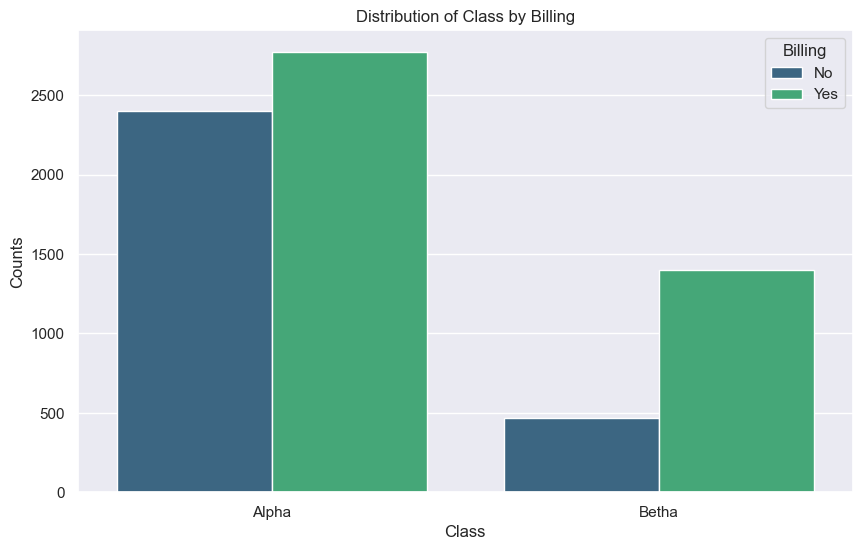

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

# Contar las combinaciones de class y billing
class_billing_counts = data.groupby(['Class', 'PaperlessBilling']).size().reset_index(name='counts')

# Crear el gráfico de barras agrupadas
plt.figure(figsize=(10, 6))
sns.set(style="darkgrid")
sns.barplot(x='Class', y='counts', hue='PaperlessBilling', data=class_billing_counts, palette='viridis')

# Añadir títulos y etiquetas
plt.title('Distribution of Class by Billing')
plt.ylabel('Counts')
plt.xlabel('Class')
plt.legend(title='Billing')

# Mostrar el gráfico
plt.show()

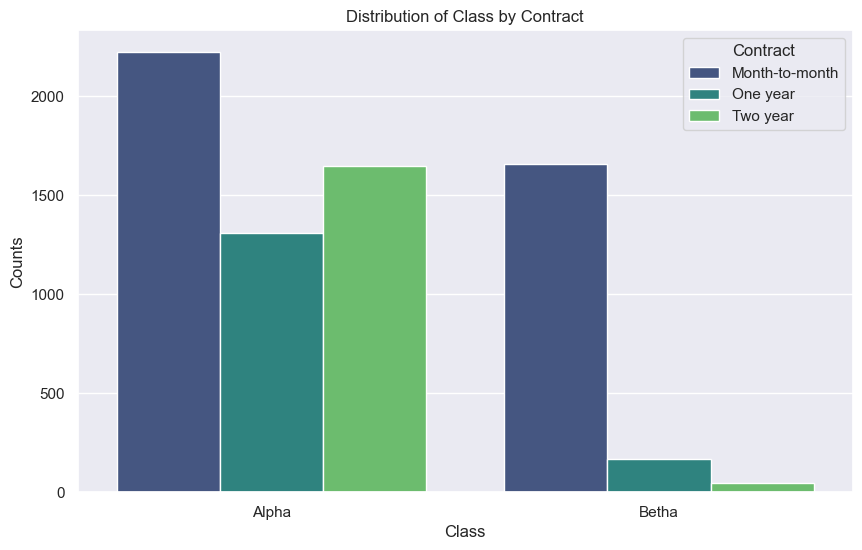

In [13]:
# Contar las combinaciones de class y billing
class_contract_counts = data.groupby(['Class', 'Contract']).size().reset_index(name='counts')

# Crear el gráfico de barras agrupadas
plt.figure(figsize=(10, 6))
sns.set(style="darkgrid")
sns.barplot(x='Class', y='counts', hue='Contract', data=class_contract_counts, palette='viridis')

# Añadir títulos y etiquetas
plt.title('Distribution of Class by Contract')
plt.ylabel('Counts')
plt.xlabel('Class')
plt.legend(title='Contract')

# Mostrar el gráfico
plt.show()

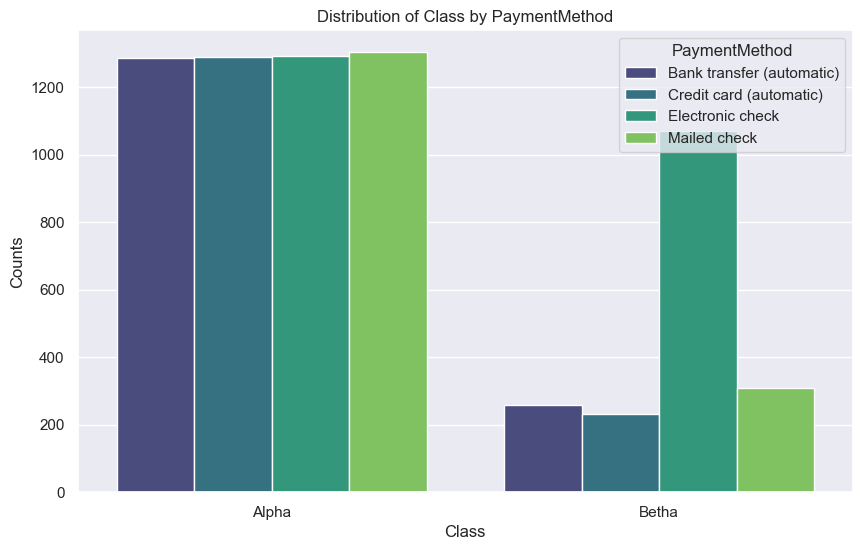

In [14]:
# Contar las combinaciones de class y billing
class_payment_counts = data.groupby(['Class', 'PaymentMethod']).size().reset_index(name='counts')

# Crear el gráfico de barras agrupadas
plt.figure(figsize=(10, 6))
sns.set(style="darkgrid")
sns.barplot(x='Class', y='counts', hue='PaymentMethod', data=class_payment_counts, palette='viridis')

# Añadir títulos y etiquetas
plt.title('Distribution of Class by PaymentMethod')
plt.ylabel('Counts')
plt.xlabel('Class')
plt.legend(title='PaymentMethod')

# Mostrar el gráfico
plt.show()

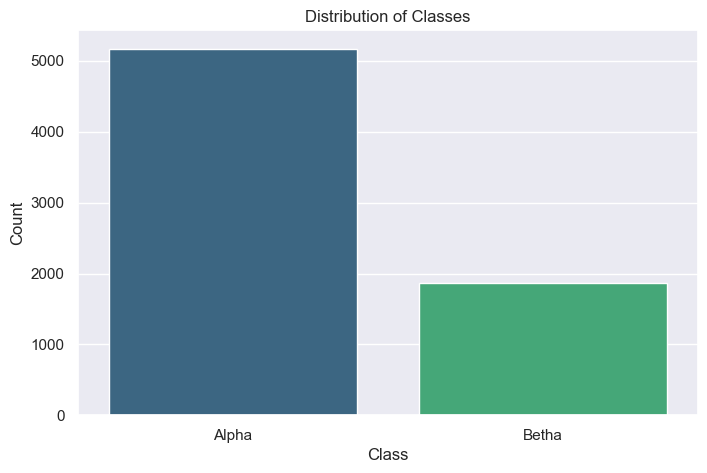

In [15]:
# Contar las muestras de cada clase
class_counts = data['Class'].value_counts().reset_index()
class_counts.columns = ['Class', 'Count']

# Crear el gráfico de barras
plt.figure(figsize=(8, 5))
sns.set(style="darkgrid")
ax = sns.barplot(x='Class', y='Count', data=class_counts, palette='viridis')

# Añadir títulos y etiquetas
plt.title('Distribution of Classes')
plt.ylabel('Count')
plt.xlabel('Class')

# Mostrar el gráfico
plt.show()

### 2.2 Evaluación de Modelos

In [24]:
!pip install imblearn
!pip install scikit-learn==1.3.2
!pip install numpy


[notice] A new release of pip is available: 23.2.1 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('../data/dataset_alpha_betha.csv')
data.dropna() 

# Data Preprocessing
data.drop(['autoID'], axis=1, inplace=True)
data['Demand'] = pd.to_numeric(data['Demand'], errors='coerce')
data.dropna(subset=['Demand'], inplace=True)
data['Demand'] = data['Demand'].astype('float64')

# Codificar variables categóricas
label_encoders = {}
for column in data.select_dtypes(include=['object']).columns:
    if column != 'Class':
        le = LabelEncoder()
        data[column] = le.fit_transform(data[column])
        label_encoders[column] = le

# Codificar la variable objetivo
class_le = LabelEncoder()
data['Class'] = class_le.fit_transform(data['Class'])

# Características y variable objetivo
X = data.drop('Class', axis=1)
y = data['Class']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Balancear los datos con SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


n_y0 = len(y_train_resampled[y_train_resampled == 0])
n_y1 = len(y_train_resampled[y_train_resampled == 1])
scale = n_y0/n_y1
print("ESCALEE: ", scale)


# Normalizar las características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

# Crear pipelines para cada modelo
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'XGBoost': xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
}

# Obtener importancias de características para cada modelo
feature_importances = {}
for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train_scaled, y_train_resampled)

    if name == 'XGBoost':
        importances = model.feature_importances_
    elif name == 'Random Forest':
        importances = model.feature_importances_
    elif name == 'Logistic Regression':
        importances = np.abs(model.coef_[0])

    feature_importances[name] = dict(zip(X.columns, importances))

# Combinar importancias de características
combined_importances = {}
for feature in X.columns:
    combined_importances[feature] = np.mean([feature_importances[model][feature] for model in models])

# Obtener las 10 características más importantes en común
top_10_features = sorted(combined_importances.items(), key=lambda x: x[1], reverse=True)[:10]
top_10_feature_names = [feature for feature, _ in top_10_features]

print("\nTop 10 Common Features Across Models:")
print(top_10_feature_names)

# Filtrar el dataset para incluir solo las 10 características más importantes
X_top_10 = X[top_10_feature_names]

# Dividir los datos en conjuntos de entrenamiento y prueba usando las 10 características más importantes
X_train_top_10, X_test_top_10, y_train_top_10, y_test_top_10 = train_test_split(X_top_10, y, test_size=0.2, random_state=42, stratify=y)

# Balancear los datos con SMOTE
X_train_top_10_resampled, y_train_top_10_resampled = smote.fit_resample(X_train_top_10, y_train_top_10)

# Normalizar las características
X_train_top_10_scaled = scaler.fit_transform(X_train_top_10_resampled)
X_test_top_10_scaled = scaler.transform(X_test_top_10)

# Crear y entrenar modelos con las 10 características más importantes
for name, model in models.items():
    print(f"\nTraining {name} with Top 10 Features...")
    model.fit(X_train_top_10_scaled, y_train_top_10_resampled)
    y_pred = model.predict(X_test_top_10_scaled)
    print(f"\n{name} Classification Report with Top 10 Features:\n")
    print(classification_report(y_test_top_10, y_pred))

    # Obtener y mostrar importancias de características
    if name == 'XGBoost':
        importances = model.feature_importances_
    elif name == 'Random Forest':
        importances = model.feature_importances_
    elif name == 'Logistic Regression':
        importances = np.abs(model.coef_[0])

    feature_importances = list(zip(top_10_feature_names, importances))
    feature_importances.sort(key=lambda x: x[1], reverse=True)

    print(f"\nTop Features for {name} with Top 10 Features:")
    for feature, importance in feature_importances:
        print(f"{feature}: {importance:.4f}")


ESCALEE:  1.0
Training Logistic Regression...
Training Random Forest...
Training XGBoost...


c:\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [23:06:11] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Top 10 Common Features Across Models:
['Contract', 'Charges', 'Security', 'Demand', 'TechSupport', 'Dependents', 'Service1', 'OnlineBackup', 'Partner', 'SeniorCity']

Training Logistic Regression with Top 10 Features...

Logistic Regression Classification Report with Top 10 Features:

              precision    recall  f1-score   support

           0       0.88      0.72      0.79      1033
           1       0.49      0.73      0.59       374

    accuracy                           0.73      1407
   macro avg       0.69      0.73      0.69      1407
weighted avg       0.78      0.73      0.74      1407


Top Features for Logistic Regression with Top 10 Features:
Contract: 0.9840
Charges: 0.9000
Security: 0.3696
TechSupport: 0.3448
Dependents: 0.3295
Demand: 0.3163
Service1: 0.2884
OnlineBackup: 0.2663
Partner: 0.2380
SeniorCity: 0.1939

Training Random Forest with Top 10 Features...

Random Forest Classification Report with Top 10 Features:

              precision    recall  f1-sco

c:\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [23:06:16] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



XGBoost Classification Report with Top 10 Features:

              precision    recall  f1-score   support

           0       0.85      0.80      0.83      1033
           1       0.53      0.63      0.57       374

    accuracy                           0.75      1407
   macro avg       0.69      0.71      0.70      1407
weighted avg       0.77      0.75      0.76      1407


Top Features for XGBoost with Top 10 Features:
Contract: 0.6068
Security: 0.0896
TechSupport: 0.0692
Dependents: 0.0518
OnlineBackup: 0.0450
Service1: 0.0428
Charges: 0.0283
Partner: 0.0238
Demand: 0.0221
SeniorCity: 0.0205


### 2.3 Modelo Final, Almacenamiento, Escritura de Reporte

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import joblib
import matplotlib.pyplot as plt

data = pd.read_csv('../data/dataset_alpha_betha.csv')
data.dropna() 

# Data Preprocessing
data.drop(['autoID'], axis=1, inplace=True)
data['Demand'] = pd.to_numeric(data['Demand'], errors='coerce')
data.dropna(subset=['Demand'], inplace=True)
data['Demand'] = data['Demand'].astype('float64')

# Codificar variables categóricas
label_encoders = {}
for column in data.select_dtypes(include=['object']).columns:
    if column != 'Class':
        le = LabelEncoder()
        data[column] = le.fit_transform(data[column])
        label_encoders[column] = le

# Codificar la variable objetivo
class_le = LabelEncoder()
data['Class'] = class_le.fit_transform(data['Class'])

# Guardar los label encoders
output_dir = 'output'
for column, encoder in label_encoders.items():
    joblib.dump(encoder, f'output/encoders/{column}_label_encoder.pkl')
joblib.dump(class_le, f'output/encoders/class_label_encoder.pkl')

# Características y variable objetivo
X = data.drop('Class', axis=1)
y = data['Class']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Balancear los datos con SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Normalizar las características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

# Crear y entrenar el modelo RandomForest
estimators = 20
model = RandomForestClassifier(n_estimators=estimators, random_state=42)
model.fit(X_train_scaled, y_train_resampled)

# Predecir en el conjunto de prueba
y_pred = model.predict(X_test_scaled)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Obtener importancias de características
importances = model.feature_importances_
feature_importances = dict(zip(X.columns, importances))

# Obtener las 10 características más importantes
top_10_features = sorted(feature_importances.items(), key=lambda x: x[1], reverse=True)[:10]
top_10_feature_names = [feature for feature, _ in top_10_features]

print("\nTop 10 Features:")
print(top_10_feature_names)

# Filtrar el dataset para incluir solo las 10 características más importantes
X_top_10 = X[top_10_feature_names]

# Dividir los datos en conjuntos de entrenamiento y prueba usando las 10 características más importantes
X_train_top_10, X_test_top_10, y_train_top_10, y_test_top_10 = train_test_split(X_top_10, y, test_size=0.2, random_state=42, stratify=y)
# Balancear los datos con SMOTE
smote = SMOTE(random_state=42)
X_train_top_10_resampled, y_train_top_10_resampled = smote.fit_resample(X_train_top_10, y_train_top_10)



# Normalizar las características
scaler = StandardScaler()
X_train_top_10_scaled = scaler.fit_transform(X_train_top_10_resampled)
X_test_top_10_scaled = scaler.transform(X_test_top_10)
# Guardar el scaler
joblib.dump(scaler, 'output/encoders/features_scaler.pkl')

# Entrenar el modelo RandomForest con las 10 características más importantes
# Crear nuevo modelo  y entrenar el modelo RandomForest
model_top_10 = RandomForestClassifier(n_estimators=estimators, random_state=42)
model_top_10.fit(X_train_top_10_scaled, y_train_top_10_resampled)

# Predecir en el conjunto de prueba
y_pred_top_10 = model_top_10.predict(X_test_top_10_scaled)

# Evaluar el modelo
accuracy_top_10 = accuracy_score(y_test_top_10, y_pred_top_10)
class_report_top_10 = classification_report(y_test_top_10, y_pred_top_10)
conf_matrix_top_10 = confusion_matrix(y_test_top_10, y_pred_top_10)

# Guardar el modelo
joblib.dump(model_top_10, 'output/clasificator_model.pkl')

# Guardar las métricas
with open('output/output_clasificator.txt', 'w') as f:
    f.write("Model: RandomForestClassifier with Top 10 Features\n")
    f.write("Description: RandomForestClassifier is an ensemble learning method based on constructing multiple decision trees during training and outputting the mode of the classes for classification.\n")
    f.write("Number of trees (n_estimators): {}\n".format(estimators))
    f.write("Random state: 42\n")
    f.write("Number of training samples: {}\n".format(len(X_train_top_10_scaled)))
    f.write("Number of testing samples: {}\n".format(len(X_test_top_10_scaled)))
    f.write("Accuracy: {}\n".format(accuracy_top_10))
    f.write("Classification Report:\n{}\n".format(class_report_top_10))
    f.write("Confusion Matrix:\n{}\n".format(conf_matrix_top_10))
    f.write("Features used:\n{}\n".format(top_10_feature_names))
    f.write("Observations: The dataset was balanced using SMOTE to address class imbalance before training. Features were scaled using StandardScaler.\n")

print("Model training and evaluation with top 10 features complete. Metrics saved to output_clasificator.txt.")



Top 10 Features:
['Demand', 'Charges', 'Contract', 'TechSupport', 'Security', 'PaymentMethod', 'OnlineBackup', 'DeviceProtection', 'Dependents', 'Partner']
Model training and evaluation with top 10 features complete. Metrics saved to output_clasificator.txt.
